<a href="https://colab.research.google.com/github/aleksejalex/PyPEF/blob/main/PyPEF_05_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyPEF, lecture 05. Practical examples of numerical computations. Symbolic computations in Python. Introduction to Plots.

Prepared by: Aleksej Gaj ( pythonforstudents24@gmail.com )

🔗 Course website: [https://aleksejalex.4fan.cz/pef_python/](https://aleksejalex.4fan.cz/pef_python/)


In this tutorial we familiarize ourselves with
 - a few useful examples to recall library NumPy that we have learned about the last time
 - symbolic expressions and computations in Python - library SymPy
 - plots in Python (library Matplotlib)


### Solution of the optional homework 2 (matrices...):

*task:* write a function, that will take a matrix, and:
 - check if the matrix is square
 - if it's square, return its determinant (`np.det(A)`)
 - if it's *not* square, reshape it so it's square and then return its determinant
 - if reshaping is not possible (odd number of elements), fill it with ones

(use library NumPy)
  

In [ ]:
import numpy as np

*Logic of code:*
1. get number of rows and columns in a matrix
2. if they are the same, matrix is squared -> return determinant
3. reshape: take a matrix of ones of "the bigger" size and rewrite some values with values of original matrix

In [ ]:
def extend_to_square(A, fill_value=1):
    # Determine the dimensions of the original array
    rows, cols = A.shape
    max_dim = max(rows, cols)

    # Create a new square array filled with the specified value
    #A_squared = np.full((max_dim, max_dim), fill_value, dtype=float)
    A_squared = np.ones((max_dim, max_dim), dtype=float) #float is needed, otherwise A_squared will round up values of A

    # Copy the original array into the upper-left corner of the square array
    A_squared[:rows, :cols] = A  # left side: everything in A_squared on rows from 1 to number
    #                              'rows' and everything on columns from 1 to number 'cols'

    return A_squared

In [ ]:
A = np.random.rand(3,2)
print(f'A = \n {A}')
Anew = extend_to_square(A)
print(f'A_squared = \n {Anew}')

A = 
 [[0.17370386 0.49461352]
 [0.83851245 0.58919054]
 [0.24684024 0.29346966]]
A_squared = 
 [[0.17370386 0.49461352 1.        ]
 [0.83851245 0.58919054 1.        ]
 [0.24684024 0.29346966 1.        ]]


In [ ]:
def my_det(A):
    rows, cols = A.shape
    if rows == cols:
        return np.linalg.det(A)
    else:
        Anew = extend_to_square(A)
        return np.linalg.det(Anew)

In [ ]:
#test it:

A1 = np.random.rand(3,3)
print(f"my_det(A1) = {my_det(A1)}")

A2 = np.random.rand(3,2)
print(f"my_det(A2) = {my_det(A2)}")

my_det(A1) = -0.003971284360180566
my_det(A2) = 0.22055277350193847


## Useful practice: how to solve $\mathbb{A} \cdot \vec{x} = \vec{b}$?

You definitely remember solving systems of linear equations in primary school.

$$\left\{
\begin{align*}
2x + 3y - z &= 7 \\
4x - 2y + 5z &= 3 \\
x + y - 3z &= -2 \\
\end{align*} \right. $$

At the beginning of your algebra course, you used matrices for the same task:

$$
\mathbb{A} = \begin{pmatrix}
2 & 3 & -1 \\
4 & -2 & 5 \\
1 & 1 & -3 \\
\end{pmatrix}, \quad \vec{b} = \begin{pmatrix} 7 \\ 3 \\ -2 \end{pmatrix}
$$

and you searched for $\vec{x} = \begin{pmatrix} x \\ y \\ z  \end{pmatrix}$ as the solution of $\mathbb{A} \cdot \vec{x} = \vec{b}$.


Mathematical solution: $\vec{x} = \mathbb{A}^{-1} \cdot \vec{b} $

In [ ]:
# Let's define A and b from example above using NumPy:
import numpy as np

A = np.array([[2, 3, -1], [4, -2, 5], [1, 1, -3]])
b = np.array([7, 3, -2])

### Aproach 1: do it manually (almost):

In [ ]:
x = np.linalg.inv(A) @ b
x

array([0.10638298, 2.80851064, 1.63829787])

In [ ]:
# "quality check":
A @ x

array([ 7.,  3., -2.])

### Aproach 2: use NumPy solver:

In [ ]:
xx = np.linalg.solve(A, b)
xx

array([0.10638298, 2.80851064, 1.63829787])

In [ ]:
# "quality check":
A @ x

array([ 7.,  3., -2.])

### Comparison: speed?

In [ ]:
# approach 1:
%timeit np.linalg.inv(   np.random.rand(3, 3)  ) @ np.random.rand(3, 1)

20.3 µs ± 3.09 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
# approach 2:
%timeit np.linalg.solve(   np.random.rand(3, 3), np.random.rand(3, 1) )

12.2 µs ± 456 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


🤔 ..not a difference, huh?

Just *wait for it*:

In [ ]:
# approach 1:
%timeit np.linalg.inv(   np.random.rand(3000, 3000)  ) @ np.random.rand(3000, 1)

1.92 s ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# approach 2:
%timeit np.linalg.solve(   np.random.rand(3000, 3000), np.random.rand(3000, 1) )

605 ms ± 21.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Practice 2: system of equations with parameter

Now we are able to solve any system of linear equations. But what if it contains a parameter (and we seek for a parametric solution)?

*Example:*

$$\left\{
\begin{align*}
2x + \alpha y - z &= 7 \\
4 \alpha x - 2y + 5z &= 3 \\
x + y - 3 \alpha z &= -2 \\
\end{align*} \right. $$

This time, we cannot use NumPy effectively - since we do not search for a *numeric* solution, but rather *functional*.

So we need a solution as $x = x(\alpha)$, $y = y(\alpha)$, $z = z(\alpha)$.

### Solution: a very brief demo of SymPy

<img src="https://www.sympy.org/static/images/logo.png" alt="logo" width="200">

 = library for symbolic mathematics - it means this library does consider some variables as *real* variables (in matheamtical sense). Such variables are called "symbols" - and Python should be explicitly told which variable(s) must be considered as symbols.

 - a powerful tool (= full-featured computer algebra system)
 - suitable for: solving equations, basic calculus, differential equations, integral equations, .... [and much more](https://www.sympy.org/en/features.html)
 - [documentation](https://www.sympy.org/en/index.html)
 - [live shell to try in your browser](https://www.sympy.org/en/shell.html) ... can be handy when doing some math homework
 - Fun fact: SymPy was made by our fellow countryman Ondřej Čertík


In [ ]:
import sympy as sp

In [ ]:

# Define mathematical variables
x, y, z, alpha = sp.symbols('x y z alpha')

# Define the equations .... format:  Eq(<left side>, <right side>)
eq1 = sp.Eq(2*x + alpha*y - z, 7)
eq2 = sp.Eq(4*alpha*x - 2*y + 5*z, 3)
eq3 = sp.Eq(x + y - 3*alpha*z, -2)

# Solve the system of equations .... format:  solve(<tuple containing eqautions>, <tuple of variables> )
solution = sp.solve((eq1, eq2, eq3), (x, y, z))

# 'solution' is a Python dictionary

# Extract expressions for x, y, and z in terms of alpha
x_alpha = solution[x]
y_alpha = solution[y]
z_alpha = solution[z]

# Display the solutions
print("Parametric solutions:")
print("x =", x_alpha)
print("y =", y_alpha)
print("z =", z_alpha)

Parametric solutions:
x = (9*alpha**2 + 32*alpha - 34)/(12*alpha**3 + 13*alpha - 12)
y = (84*alpha**2 - 10*alpha + 58)/(12*alpha**3 + 13*alpha - 12)
z = (8*alpha**2 + 31*alpha + 16)/(12*alpha**3 + 13*alpha - 12)


That looks ugly. Better print (supported in console):

In [ ]:
sp.printing.pretty_print(x_alpha)

    2            
 9⋅α  + 32⋅α - 34
─────────────────
    3            
12⋅α  + 13⋅α - 12


Even better (**jupyter notebooks only!**):

In [ ]:
from IPython.display import display
display(x_alpha, y_alpha, z_alpha)

(9*alpha**2 + 32*alpha - 34)/(12*alpha**3 + 13*alpha - 12)

(84*alpha**2 - 10*alpha + 58)/(12*alpha**3 + 13*alpha - 12)

(8*alpha**2 + 31*alpha + 16)/(12*alpha**3 + 13*alpha - 12)

### Try it yourself: Eigenvalues of a matrix

**task:** find eigenvalues of a matrix $
\mathbb{A} = \begin{pmatrix}
2 & 3 & -1 \\
4 & -2 & 5 \\
1 & 1 & -3 \\
\end{pmatrix} $. Use:
1) built-in function in library NumPy
2) solve it "manually"

*Hint*/reminder:

 - what are eigenvalues (cz. *vlastní čísla matice*) ... [here](https://www.mathsisfun.com/algebra/eigenvalue.html) or [wiki](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)
 - eigenvalues $\lambda$ of matrix $\mathbb{A}$ satisfy $\mathbb{A}\cdot \vec{x} = \lambda\cdot \vec{x}$
 - so we need to find such $\lambda$-s, for which  $\left( \mathbb{A}-\lambda\mathbb{I} \right)\cdot \vec{x} = \vec{0}$ has *non-trivial* solution
 - in other words we search for $\lambda$ values, for which matrix $\mathbb{A}-\lambda\mathbb{I}$ is not regular  <--> its determinant should be zero
 - how to get them? find roots of polynomial $p(\lambda) = \det \left( \mathbb{A} - \lambda \mathbb{I} \right) = 0$



*Implementation:*
 - approach 1: use NumPy to find eigenvalues directly (numerically)
 - approach 2 (*advanced*): use SymPy to find eigenvalues

*Hint:*
 - NumPy function: [np.linalg.eig()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)
 - SymPy function: [eigenvals](https://docs.sympy.org/latest/tutorials/intro-tutorial/matrices.html#eigenvalues-eigenvectors-and-diagonalization), you might need to look up how to work with matrices in SymPy

In [ ]:
# try it here:
A = np.array([[2, 3, -1], [4, -2, 5], [1, 1, -3]])



## Plots: graphical visualisation of nearly anything

 - important uses:
   - visualise your data before analysis (ensure you know what are you going to analyse)
   - present results in intuitive form (obvious)
 - there exist several libraries with endless possibilities:
   - **Matplotlib** ... most common, many other libraries use it, suitable also for images [homepage](https://matplotlib.org/)
   - **Plotly** ... for interactive plots (for ex.: to embed scalalble graph into HTMLK webpage)
   - **seaborn** ... statistical data visualisation, high level interface (by default "more beautiful" then manual plotting in Matplotlib) [homepage](https://seaborn.pydata.org/)

*Today:* Matplotlib


In [ ]:
# import (note:we import a specific part of matplotlib):
import matplotlib.pyplot as plt  # plt is very common shortcut for pyplot

Example (the simpliest one):

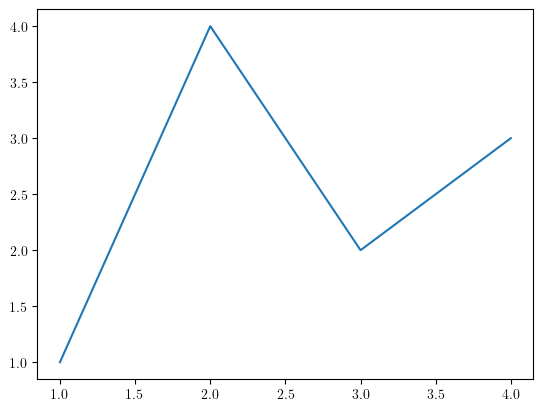

In [ ]:
plt.figure()
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])
plt.show()

Seems strightforward:
 - `plt.figure()` ... initialisation ("I'm going to plot something")
 - `plt.plot([1, 2, 3, 4], [1, 4, 2, 3]) ` ... function that takes the data and plots them
 - `plt.show() ` ... ending command ("Hey, stop plotting, show me the result")

*Note:* `plt.show()` is not mandatory in jupyter notebook, but it's a good practice to include it, since scripted Python requires it

In our example, we wanted to plot points, but line was plotted. Let's fix it:

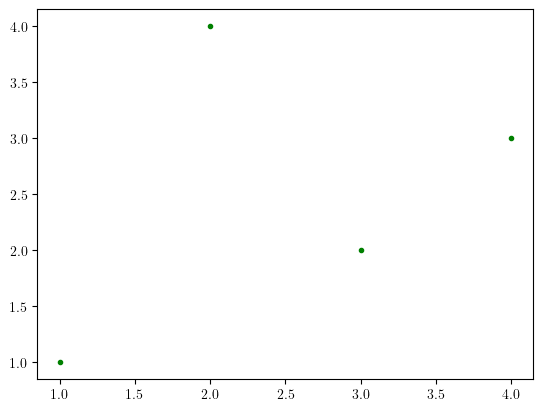

In [ ]:
plt.figure()
x = [1, 2, 3, 4]
y = [1, 4, 2, 3]
plt.plot(x, y, color='green', marker='.', linestyle=' ')
plt.show()

Before getting further in plotting - let's try plotting a Gaussian pdf that we have implementred at home:

### Solution of optional homework 1 (gaussian pdf):
*task:* write a function `gauss()` that will return a value of Gaussian probability distribution function.
Make mean value $\mu$ (`mu`) and dispersion $\sigma$ (`sigma`) optional arguments.

Hint/reminder:
$$
    y = \frac{1}{\sqrt{2 \pi \sigma^2} } e^{- \frac{(x - \mu)^2}{2 \sigma^2}}
$$

Default values: $\mu = 0$, $\sigma = 1$.

(more on gaussian curve >> [here](https://en.wikipedia.org/wiki/Normal_distribution))

In [ ]:
import numpy as np

def gauss(x, mu=0, sigma=1):
    return 1/(np.sqrt(2*np.pi*sigma**2)) * np.exp(- ((x-mu)**2)/(2*sigma**2))

x = 1
y = gauss(x)
print(y)
y = gauss(x, mu=2, sigma=0.2)
print(y)

0.24197072451914337
7.433597573671502e-06


📝 Recall from NumPy: there are two ways how to set argument values:
 - `np.linspace(START, STOP, NUM)` ...generates `NUM` evenly spaced numbers over the closed interval [`START`, `STOP`]
 - `np.arange(START, STOP, STEP)` ...generates numbers in the half-open interval [`START`, `STOP`) with a specified `STEP` size.

In [ ]:
x = np.arange(-3, 3, 0.1)

Now let's plot it! (you can plot your own solution of the homework if you want to)

In [ ]:
# your code here

Now we can see one more time, how using NumPy functions is useful:
`y = gauss(x)` means function `gauss` takes whole array `x` as an argument and returns array `y` (it *does not* take elements of x one by one). Mathematically it doesn't matter. Technically - it's possible thanks to functions `np.exp` and `np.sqrt` that can map `np.array` to `np.array` (for details - see previous lecture).

### Several plots in one figure
of course in many situations it's convenient to see several functions in one plot:

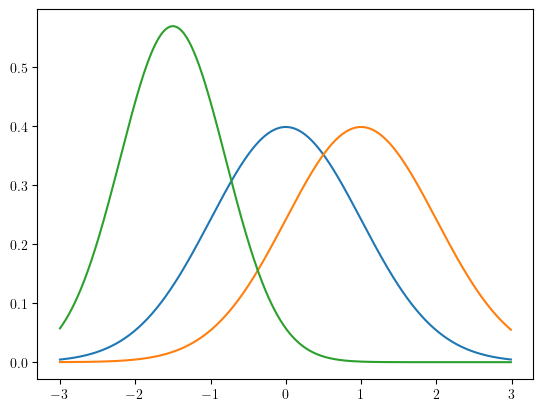

In [ ]:
x = np.arange(-3, 3, 0.01)

plt.figure()
plt.plot(x, gauss(x))
plt.plot(x, gauss(x, mu=1))
plt.plot(x, gauss(x, mu=-1.5, sigma=0.7))
plt.show()

### Make your plots visually acceptable
What every plot (graph) *should* have:
 - title of axes (what is on `x`, what is on `y`)
 - legend - in case you plot several graphs in one image
 - title of figure (can be omitted if you add desription in you Word/PowerPoint/LaTeX document)

Sometimes is useful:
 - grid

Let's see how all this add to our plot above:

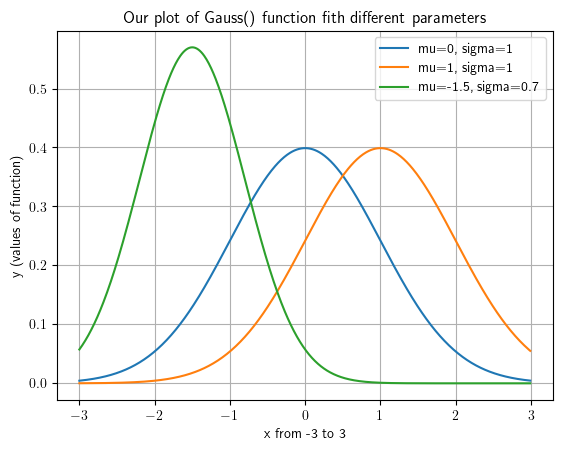

In [ ]:
x = np.arange(-3, 3, 0.01)

plt.figure()
plt.plot(x, gauss(x))
plt.plot(x, gauss(x, mu=1))
plt.plot(x, gauss(x, mu=-1.5, sigma=0.7))
plt.xlabel("x from -3 to 3")
plt.ylabel("y (values of function)")
plt.title("Our plot of Gauss() function fith different parameters")
plt.legend(['mu=0, sigma=1','mu=1, sigma=1', 'mu=-1.5, sigma=0.7'])
plt.grid()
plt.show()

✨ set figure size, dpi, and save it as PNG or SVG:

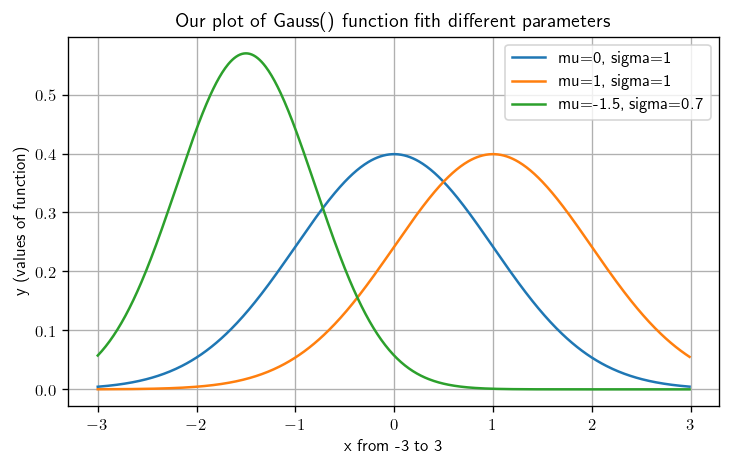

In [ ]:
x = np.arange(-3, 3, 0.01)

plt.figure(figsize=(7,4), dpi=120)
plt.plot(x, gauss(x))
plt.plot(x, gauss(x, mu=1))
plt.plot(x, gauss(x, mu=-1.5, sigma=0.7))
plt.xlabel("x from -3 to 3")
plt.ylabel("y (values of function)")
plt.title("Our plot of Gauss() function fith different parameters")
plt.legend(['mu=0, sigma=1','mu=1, sigma=1', 'mu=-1.5, sigma=0.7'])
plt.grid()
plt.savefig("my_gauss.png", dpi=230)
plt.show()

🎨 Get creative: change colors, change `figsize` (it deforms the plot), ... \
Deforming a plot ( = changing aspect ratio) is very useful when you need to squeeze a graph on a page with text... or a slide...

### Other type of plots - next time!
Until then you can have a look on those basic plot types: [here](https://matplotlib.org/stable/plot_types/index.html)

### Try it yourself (Optional homework):
**task:** plot
 - in one figure sinus and cosinus
 - in second figure exponential and logarithm function

In each graph make functions of different color of your choice and of course don't forget to add labels to axes, legend,.... Consider grid. Export as PNG and SVG.

Use NumPy and Matplotlib libraries.

### Optional homework 2:
**task:** compute a mean (cz. *střední hodnota*) and median of each of functions you plotted above. Copy your solution from above and plot a mean value of each function as a red dot.

## P.S.

In [ ]:
# Enable LaTeX processing
plt.rcParams.update({
    "text.usetex": True
})

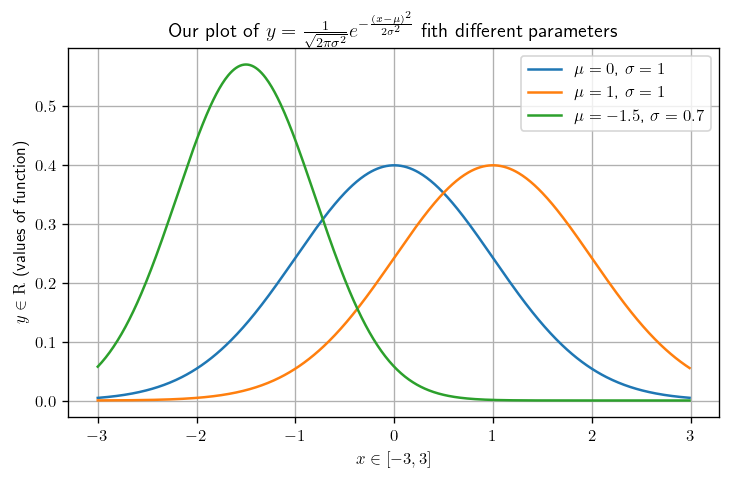

In [ ]:
x = np.arange(-3, 3, 0.01)

plt.figure(figsize=(7,4), dpi=120)
plt.plot(x, gauss(x))
plt.plot(x, gauss(x, mu=1))
plt.plot(x, gauss(x, mu=-1.5, sigma=0.7))
plt.xlabel(r"$x \in  \left[ -3, 3  \right] $")
plt.ylabel(r"$y \in \mathrm{R}$ (values of function)")
plt.title(r"Our plot of $y = \frac{1}{\sqrt{2 \pi \sigma^2} } e^{- \frac{(x - \mu)^2}{2 \sigma^2}}$ fith different parameters")
plt.legend([r"$\mu=0$, $\sigma=1$", r"$\mu=1$, $\sigma=1$", r"$\mu=-1.5$, $\sigma=0.7$"])
plt.grid()
plt.savefig("my_gauss_with_LaTeX_labels.png", dpi=230)
plt.show()